In [1]:
import numpy as np
import torch
from sbi import utils as utils
from sbi import analysis as analysis
from utils.data_formats import timeseries_to_channels
from simulators import Simulator
from spectralcomponents import PowerLaw, DeltaEmissionLine, Spectrum, BrokenPowerLaw
from sbi.inference import SNRE_B, SNLE, prepare_for_sbi, simulate_for_sbi
from sbi.neural_nets.embedding_nets import FCEmbedding, CNNEmbedding, PermutationInvariantEmbedding
from sbi_tools import BoxUniform
from sbi.inference import SNPE
from sbi.utils import posterior_nn, likelihood_nn
from matplotlib import pyplot as plt



c1 = PowerLaw()
c2 = DeltaEmissionLine()
spectrum = Spectrum(c1, c2)

prior = BoxUniform(low=torch.tensor([0.1, 0.1, 0.1, 0.1]), 
                   high=torch.tensor([2, 5, 100, 11]))
def simulate_simple(params):
    #alpha = float(params[-1].numpy())
    simulator =  Simulator(spectrum, 10000, pileup='channels', alpha=0.7)
    data = simulator(params)
    return np.bincount(data, minlength=1025)[1:]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-09 11:54:03.328823: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


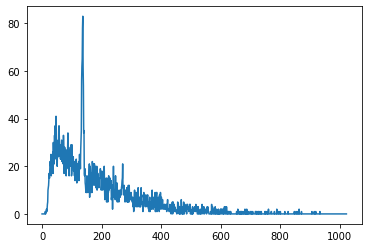

In [2]:
true_params = (0.4,2, 10,2)
x0 = simulate_simple(true_params)
plt.plot(x0)

# SNPE

In [3]:

embedding_net = FCEmbedding(input_dim=1024, output_dim=100, num_layers=3, num_hiddens=1024)
neural_posterior = posterior_nn(
    model="nsf", 
    embedding_net=embedding_net, 
    hidden_features=200, 
    num_transforms=5
)

inference = SNPE(
    prior=prior, 
    density_estimator=neural_posterior
)

simulator, prior = prepare_for_sbi(simulate_simple, prior)

proposal = prior
num_rounds = 10
num_sims = 200
for _ in range(num_rounds):
    theta, x = simulate_for_sbi(simulator, proposal, num_sims)
    _ = inference.append_simulations(theta, x, proposal=proposal).train()
    posterior = inference.build_posterior().set_default_x(x0)
    proposal = posterior

Running 200 simulations.: 100%|██████████| 200/200 [01:21<00:00,  2.44it/s]


 Neural network successfully converged after 32 epochs.

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nflows/transforms/lu.py:80: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:2198.)
  outputs, _ = torch.triangular_solve(
Drawing 200 posterior samples: 248it [00:00, 2102.44it/s]             
Running 200 simulations.: 100%|██████████| 200/200 [01:40<00:00,  1.99it/s]


Using SNPE-C with atomic loss
 Neural network successfully converged after 34 epochs.

Drawing 200 posterior samples: 224it [00:00, 1787.25it/s]             
Running 200 simulations.: 100%|██████████| 200/200 [01:33<00:00,  2.13it/s]


Using SNPE-C with atomic loss
 Neural network successfully converged after 67 epochs.

Drawing 200 posterior samples: 234it [00:00, 2410.73it/s]             
Running 200 simulations.: 100%|██████████| 200/200 [01:12<00:00,  2.75it/s]


Using SNPE-C with atomic loss
 Neural network successfully converged after 41 epochs.

Drawing 200 posterior samples: 236it [00:00, 655.47it/s]                        
Running 200 simulations.: 100%|██████████| 200/200 [01:46<00:00,  1.88it/s]


Using SNPE-C with atomic loss
 Neural network successfully converged after 28 epochs.

Drawing 200 posterior samples: 246it [00:00, 1838.09it/s]             
Running 200 simulations.: 100%|██████████| 200/200 [01:36<00:00,  2.06it/s]


Using SNPE-C with atomic loss
 Neural network successfully converged after 58 epochs.

Drawing 200 posterior samples: 231it [00:00, 1370.00it/s]             
Running 200 simulations.: 100%|██████████| 200/200 [01:19<00:00,  2.52it/s]


Using SNPE-C with atomic loss
 Neural network successfully converged after 28 epochs.

Drawing 200 posterior samples: 270it [00:00, 2307.99it/s]             
Running 200 simulations.: 100%|██████████| 200/200 [01:40<00:00,  1.98it/s]


Using SNPE-C with atomic loss
 Neural network successfully converged after 49 epochs.

Drawing 200 posterior samples: 248it [00:00, 1439.00it/s]             
Running 200 simulations.: 100%|██████████| 200/200 [01:27<00:00,  2.28it/s]


Using SNPE-C with atomic loss
 Neural network successfully converged after 35 epochs.

Drawing 200 posterior samples: 235it [00:00, 2423.16it/s]             
Running 200 simulations.: 100%|██████████| 200/200 [01:29<00:00,  2.22it/s]


Using SNPE-C with atomic loss
 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples: 100353it [00:22, 4460.53it/s]                           


(<Figure size 720x720 with 16 Axes>,
 array([[<AxesSubplot:xlabel='alpha'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:xlabel='beta'>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:xlabel='scale of line'>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:xlabel='line_position'>]], dtype=object))

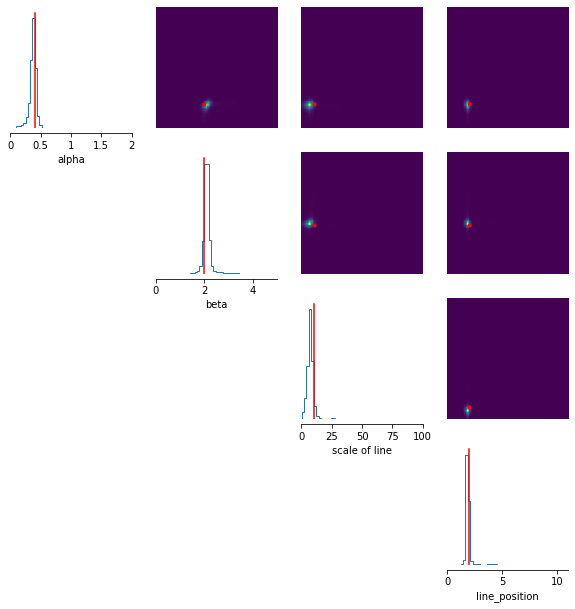

In [7]:
samples = posterior.sample((100000,), x=x0)

analysis.pairplot(samples, 
                  limits=[[0, 2], [0, 5], [0, 100], [0, 11]], 
                  points=true_params, 
                  points_offdiag={'markersize': 6}, 
                  points_colors='r',
                  labels=['alpha', 'beta', 'scale of line', 'line_position'],)

In [8]:
torch.save(posterior, 'simulated_data/power_law_emission_line/posterior_params0.2_4_10_2.pt')

In [ ]:
# MCMC sampling on true posterior
# 